<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# WorldBank - World population and density
[![download](https://img.shields.io/static/v1?label=&labelColor=000000&message=Open%20in%20Naas&color=success&logo=image%2Fsvg%2Bxml%3Bbase64%2CPD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPHN2ZyB3aWR0aD0iMTAyNHB4IiBoZWlnaHQ9IjEwMjRweCIgdmlld0JveD0iMCAwIDEwMjQgMTAyNCIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayIgdmVyc2lvbj0iMS4xIj4KIDwhLS0gR2VuZXJhdGVkIGJ5IFBpeGVsbWF0b3IgUHJvIDIuMC41IC0tPgogPGRlZnM%2BCiAgPHRleHQgaWQ9InN0cmluZyIgdHJhbnNmb3JtPSJtYXRyaXgoMS4wIDAuMCAwLjAgMS4wIDIyOC4wIDU0LjUpIiBmb250LWZhbWlseT0iQ29tZm9ydGFhLVJlZ3VsYXIsIENvbWZvcnRhYSIgZm9udC1zaXplPSI4MDAiIHRleHQtZGVjb3JhdGlvbj0ibm9uZSIgZmlsbD0iI2ZmZmZmZiIgeD0iMS4xOTk5OTk5OTk5OTk5ODg2IiB5PSI3MDUuMCI%2BbjwvdGV4dD4KIDwvZGVmcz4KIDx1c2UgaWQ9Im4iIHhsaW5rOmhyZWY9IiNzdHJpbmciLz4KPC9zdmc%2BCg%3D%3D)](https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/WorldBank/WorldBank_World_population_and_density.ipynb)

**Objective**

This graph tends to show the population repartition in the world by region. The ordinate measures the growth in population for one year, the abscissa indicates the density, and the cercle shows the number of habitants.

Source
United Nations Population Division.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# Options pour afficher plus de données sur le retour console
# pd.set_option("display.max_rows", 10)
# pd.set_option("display.max_columns", 10)

In [2]:
years = list(map(lambda a : str(a), range(1950, 2020, 1)))
usecols = ["Region, subregion, country or area *", "Country code", "Type", *years]
renamed_population_columns = {}
renamed_density_columns = {}

# On récupère nos données depuis un fichier Excel
xls_populations = pd.read_excel('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',
                    header=16,
                    encoding="utf-8",
                    usecols=usecols)

# Pour chaque année on vient créer une colonne "population_{année}" dans notre dataset
for year in years:
  xls_populations[year] = pd.to_numeric(xls_populations[year], errors='coerce')
  renamed_population_columns[year] = f"population_{year}"
xls_populations = xls_populations.rename(columns=renamed_population_columns)

# On récupère seulement les valeurs du type "Country/Area"
xls_populations = xls_populations[xls_populations['Type'] == "Country/Area"]

xls_populations

Region, subregion, country or area *  Country code          Type  \
26                               Burundi           108  Country/Area   
27                               Comoros           174  Country/Area   
28                              Djibouti           262  Country/Area   
29                               Eritrea           232  Country/Area   
30                              Ethiopia           231  Country/Area   
..                                   ...           ...           ...   
284                              Bermuda            60  Country/Area   
285                               Canada           124  Country/Area   
286                            Greenland           304  Country/Area   
287            Saint Pierre and Miquelon           666  Country/Area   
288             United States of America           840  Country/Area   

     population_1950  population_1951  population_1952  population_1953  \
26          2308.927         2360.442         2406.034         2449.089   
27           159.459          163.146          166.538          169.748   
28            62.000           63.313           64.744           66.273   
29           822.347          835.000          849.258          864.893   
30         18128.030        18466.973        18819.701        19184.288   
..               ...              ...              ...              ...   
284           37.256           37.800           38.437           39.142   
285        13733.398        14078.449        14445.453        14834.905   
286           22.993           23.466           23.936           24.465   
287            4.567            4.609            4.648            4.678   
288       158804.397       160872.264       163266.026       165909.996   

     population_1954  population_1955  population_1956  ...  population_2010  \
26          2492.192         2537.150         2584.913  ...         8675.606   
27           172.853          175.906          178.946  ...          689.696   
28            67.884           69.593           71.494  ...          840.194   
29           881.761          899.746          918.849  ...         3170.437   
30         19560.012        19947.291        20347.810  ...        87639.962   
..               ...              ...              ...  ...              ...   
284           39.914           40.709           41.535  ...           65.388   
285        15245.416        15673.764        16114.734  ...        34147.566   
286           25.092           25.846           26.727  ...           56.638   
287            4.721            4.749            4.801  ...            6.361   
288       168736.390       171685.337       174705.006  ...       309011.469   

     population_2011  population_2012  population_2013  population_2014  \
26          8958.406         9245.992         9540.302         9844.301   
27           706.578          723.865          741.511          759.390   
28           853.671          868.136          883.296          898.707   
29          3213.969         3250.104         3281.453         3311.444   
30         90139.928        92726.982        95385.793        98094.264   
..               ...              ...              ...              ...   
284           65.076           64.737           64.381           64.038   
285        34539.156        34922.031        35296.535        35664.338   
286           56.555           56.477           56.412           56.383   
287            6.323            6.251            6.168            6.073   
288       311584.051       314043.885       316400.539       318673.422   

     population_2015  population_2016  population_2017  population_2018  \
26         10160.034        10488.002        10827.010        11175.379   
27           777.435          795.597          813.890          832.322   
28           913.998          929.117          944.100          958.923   
29          3342.818         3376.558         3412.894         3452.797   
3

In [3]:
# On récupère nos données depuis un fichier Excel
xls_density = pd.read_excel('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F06_POPULATION_DENSITY.xlsx',
                    header=16,
                    encoding="utf-8",
                    usecols=["Region, subregion, country or area *", "Country code", "Type", *years])

# Pour chaque année on vient créer une colonne "density_{année}" dans notre dataset
for year in years:
  xls_density[year] = pd.to_numeric(xls_density[year], errors='coerce')
  renamed_density_columns[year] = f"density_{year}"
xls_density = xls_density.rename(columns=renamed_density_columns)

# On récupère seulement les valeurs du type "Country/Area"
xls_density = xls_density[xls_density['Type'] == "Country/Area"]

xls_density


Region, subregion, country or area *  Country code          Type  \
26                               Burundi           108  Country/Area   
27                               Comoros           174  Country/Area   
28                              Djibouti           262  Country/Area   
29                               Eritrea           232  Country/Area   
30                              Ethiopia           231  Country/Area   
..                                   ...           ...           ...   
284                              Bermuda            60  Country/Area   
285                               Canada           124  Country/Area   
286                            Greenland           304  Country/Area   
287            Saint Pierre and Miquelon           666  Country/Area   
288             United States of America           840  Country/Area   

     density_1950  density_1951  density_1952  density_1953  density_1954  \
26      89.911488     91.917523     93.692913     95.369509     97.047975   
27      85.684578     87.665771     89.488447     91.213326     92.881784   
28       2.674720      2.731363      2.793097      2.859060      2.928559   
29       8.142050      8.267327      8.408495      8.563297      8.730307   
30      18.128030     18.466973     18.819701     19.184288     19.560012   
..            ...           ...           ...           ...           ...   
284    745.120000    756.000000    768.740000    782.840000    798.280000   
285      1.510242      1.548186      1.588545      1.631373      1.676516   
286      0.056019      0.057171      0.058316      0.059605      0.061133   
287     19.856522     20.039130     20.208696     20.339130     20.526087   
288     17.360567     17.586627     17.848314     18.137354     18.446337   

     density_1955  density_1956  ...  density_2010  density_2011  \
26      98.798676    100.658606  ...    337.835125    348.847586   
27      94.522300     96.155830  ...    370.605051    379.676518   
28       3.002286      3.084297  ...     36.246506     36.827912   
29       8.908376      9.097515  ...     31.390465     31.821475   
30      19.947291     20.347810  ...     87.639962     90.139928   
..            ...           ...  ...           ...           ...   
284    814.180000    830.700000  ...   1307.760000   1301.520000   
285      1.723621      1.772114  ...      3.755158      3.798220   
286      0.062970      0.065116  ...      0.137990      0.137788   
287     20.647826     20.873913  ...     27.656522     27.491304   
288     18.768717     19.098829  ...     33.781270     34.062506   

     density_2012  density_2013  density_2014  density_2015  density_2016  \
26     360.046417    371.507087    383.345055    395.639953    408.411293   
27     388.965610    398.447609    408.054809    417.751209    427.510478   
28      37.451941     38.105953     38.770794     39.430457     40.082701   
29      32.179248     32.489634     32.786574     33.097208     33.431267   
30      92.726982     95.385793     98.094264    100.835453    103.603461   
..            ...           ...           ...           ...           ...   
284   1294.740000   1287.620000   1280.760000   1273.900000   1267.200000   
285      3.840325      3.881508      3.921955      3.961800      4.000979   
286      0.137598      0.137439      0.137369      0.137357      0.137430   
287     27.178261     26.817391     26.404348     26.052174     25.795652   
288     34.331416     34.589047     34.837519     35.078559     35.312251   

     density_2017  density_2018  density_2019  
26     421.612539    435.178310    449.010008  
27     437.340140    447.244492    457.222461  
28      40.729077     41.368550     41.999871  
29      33.791030     34.186109     34.624921  
30     106.399926    109.224410    112.078727  
..            ...           ...           ...  
284   1260.800000   1255.260000   1250.160000  
285      4.039374      4.077035      4.114037  
286      0.137588      0.137812      0.1

*Assemblage des datasets "Population total par pays de 1950 à aujourd'hui" & "Densité de population par pays de 1950 à aujourd'hui"*

In [4]:
# On vient concatener le dataset "Population" avec le dataset "Densité"
result = pd.concat([xls_populations,xls_density], sort=False)
n = result.index.nlevels
xls_global = result.groupby(level=range(n)).first()

xls_global

Region, subregion, country or area *  Country code          Type  \
26                               Burundi           108  Country/Area   
27                               Comoros           174  Country/Area   
28                              Djibouti           262  Country/Area   
29                               Eritrea           232  Country/Area   
30                              Ethiopia           231  Country/Area   
..                                   ...           ...           ...   
284                              Bermuda            60  Country/Area   
285                               Canada           124  Country/Area   
286                            Greenland           304  Country/Area   
287            Saint Pierre and Miquelon           666  Country/Area   
288             United States of America           840  Country/Area   

     population_1950  population_1951  population_1952  population_1953  \
26          2308.927         2360.442         2406.034         2449.089   
27           159.459          163.146          166.538          169.748   
28            62.000           63.313           64.744           66.273   
29           822.347          835.000          849.258          864.893   
30         18128.030        18466.973        18819.701        19184.288   
..               ...              ...              ...              ...   
284           37.256           37.800           38.437           39.142   
285        13733.398        14078.449        14445.453        14834.905   
286           22.993           23.466           23.936           24.465   
287            4.567            4.609            4.648            4.678   
288       158804.397       160872.264       163266.026       165909.996   

     population_1954  population_1955  population_1956  ...  density_2010  \
26          2492.192         2537.150         2584.913  ...    337.835125   
27           172.853          175.906          178.946  ...    370.605051   
28            67.884           69.593           71.494  ...     36.246506   
29           881.761          899.746          918.849  ...     31.390465   
30         19560.012        19947.291        20347.810  ...     87.639962   
..               ...              ...              ...  ...           ...   
284           39.914           40.709           41.535  ...   1307.760000   
285        15245.416        15673.764        16114.734  ...      3.755158   
286           25.092           25.846           26.727  ...      0.137990   
287            4.721            4.749            4.801  ...     27.656522   
288       168736.390       171685.337       174705.006  ...     33.781270   

     density_2011  density_2012  density_2013  density_2014  density_2015  \
26     348.847586    360.046417    371.507087    383.345055    395.639953   
27     379.676518    388.965610    398.447609    408.054809    417.751209   
28      36.827912     37.451941     38.105953     38.770794     39.430457   
29      31.821475     32.179248     32.489634     32.786574     33.097208   
30      90.139928     92.726982     95.385793     98.094264    100.835453   
..            ...           ...           ...           ...           ...   
284   1301.520000   1294.740000   1287.620000   1280.760000   1273.900000   
285      3.798220      3.840325      3.881508      3.921955      3.961800   
286      0.137788      0.137598      0.137439      0.137369      0.137357   
287     27.491304     27.178261     26.817391     26.404348     26.052174   
288     34.062506     34.331416     34.589047     34.837519     35.078559   

     density_2016  density_2017  density_2018  density_2019  
26     408.411293    421.612539    435.178310    449.010008  
27     427.510478    437.340140    447.244492    457.222461  
28      40.082701     40.729077     41.368550     41.999871  
29      33.431267     33.791030     34.186109     34.624921  
30     103.603461    106.399926    109.224410    112.078727  
..            ..

*Ajout du dataset "Evolution de la population par pays de 1950 à aujourd'hui" pour finaliser le dataset global*

In [5]:
# Pour chaque année on vient comparer la population total d'un pays avec celle de l'année N-1 pour en déduire son évolution sur une année
for index, year in enumerate(years):
  # Suppression des bruits (données non-traitables)
  if index is 0:
    continue
  try:
    past_year = str(int(year) - 1)
    xls_global[f'population_growth_{year}'] = (xls_global[f'population_{year}'] - xls_global[f'population_{past_year}']) / xls_global[f'population_{past_year}'] * 100
  except KeyError:
    xls_global[f'population_growth_{year}'] = np.nan

xls_global

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-5-8fb49611703a>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if index is 0:


Region, subregion, country or area *  Country code          Type  \
26                               Burundi           108  Country/Area   
27                               Comoros           174  Country/Area   
28                              Djibouti           262  Country/Area   
29                               Eritrea           232  Country/Area   
30                              Ethiopia           231  Country/Area   
..                                   ...           ...           ...   
284                              Bermuda            60  Country/Area   
285                               Canada           124  Country/Area   
286                            Greenland           304  Country/Area   
287            Saint Pierre and Miquelon           666  Country/Area   
288             United States of America           840  Country/Area   

     population_1950  population_1951  population_1952  population_1953  \
26          2308.927         2360.442         2406.034         2449.089   
27           159.459          163.146          166.538          169.748   
28            62.000           63.313           64.744           66.273   
29           822.347          835.000          849.258          864.893   
30         18128.030        18466.973        18819.701        19184.288   
..               ...              ...              ...              ...   
284           37.256           37.800           38.437           39.142   
285        13733.398        14078.449        14445.453        14834.905   
286           22.993           23.466           23.936           24.465   
287            4.567            4.609            4.648            4.678   
288       158804.397       160872.264       163266.026       165909.996   

     population_1954  population_1955  population_1956  ...  \
26          2492.192         2537.150         2584.913  ...   
27           172.853          175.906          178.946  ...   
28            67.884           69.593           71.494  ...   
29           881.761          899.746          918.849  ...   
30         19560.012        19947.291        20347.810  ...   
..               ...              ...              ...  ...   
284           39.914           40.709           41.535  ...   
285        15245.416        15673.764        16114.734  ...   
286           25.092           25.846           26.727  ...   
287            4.721            4.749            4.801  ...   
288       168736.390       171685.337       174705.006  ...   

     population_growth_2010  population_growth_2011  population_growth_2012  \
26                 3.309791                3.259715                3.210236   
27                 2.442625                2.447745                2.446581   
28                 1.494769                1.604034                1.694447   
29                 1.619176                1.373060                1.124311   
30                 2.822865                2.852541                2.870042   
..                      ...                     ...                     ...   
284               -0.437000               -0.477152               -0.520929   
285                1.189687                1.146758                1.108524   
286               -0.160412               -0.146545               -0.137919   
287                0.283777               -0.597390               -1.138700   
288                0.882742                0.832520                0.789461   

     population_growth_2013  population_growth_2014  population_growth_2015  \
26                 3.183109                3.186471                3.207267   
27                 2.437747                2.411158                2.376249   
28                 1.746270                1.744715                1.701444   
29                 0.964554                0.913955                0.947442   
30                 2.867354                2.839491                2.794444   
..                      ...                     ...       

*Création du dataset "Continents et leurs pays"*


In [6]:
# Récupération des continents via l'API RestCountries
countries = pd.read_json('https://restcountries.eu/rest/v2/all?fields=region;numericCode', dtype = {"numericCode": int})
countries = countries.rename(columns={"region": "Region", "numericCode" : "Country code"})
# Suppression du bruit (données non-traitables)
countries= countries.dropna()
# On format les données pour qu'elles correspondent au format du dataset global
countries['Country code'] = countries['Country code'].replace(regex=r"^0+", value='')
countries["Country code"] = countries["Country code"].astype(int)

countries

Region  Country code
0       Asia             4
1     Europe           248
2     Europe             8
3     Africa            12
4    Oceania            16
..       ...           ...
245  Oceania           876
246   Africa           732
247     Asia           887
248   Africa           894
249   Africa           716

[249 rows x 2 columns]

*Ajout de la colonne "Région" au dataset global*

In [7]:
xls_global = xls_global.join(countries.set_index('Country code'), on='Country code')

xls_global

Region, subregion, country or area *  Country code          Type  \
26                               Burundi           108  Country/Area   
27                               Comoros           174  Country/Area   
28                              Djibouti           262  Country/Area   
29                               Eritrea           232  Country/Area   
30                              Ethiopia           231  Country/Area   
..                                   ...           ...           ...   
284                              Bermuda            60  Country/Area   
285                               Canada           124  Country/Area   
286                            Greenland           304  Country/Area   
287            Saint Pierre and Miquelon           666  Country/Area   
288             United States of America           840  Country/Area   

     population_1950  population_1951  population_1952  population_1953  \
26          2308.927         2360.442         2406.034         2449.089   
27           159.459          163.146          166.538          169.748   
28            62.000           63.313           64.744           66.273   
29           822.347          835.000          849.258          864.893   
30         18128.030        18466.973        18819.701        19184.288   
..               ...              ...              ...              ...   
284           37.256           37.800           38.437           39.142   
285        13733.398        14078.449        14445.453        14834.905   
286           22.993           23.466           23.936           24.465   
287            4.567            4.609            4.648            4.678   
288       158804.397       160872.264       163266.026       165909.996   

     population_1954  population_1955  population_1956  ...  \
26          2492.192         2537.150         2584.913  ...   
27           172.853          175.906          178.946  ...   
28            67.884           69.593           71.494  ...   
29           881.761          899.746          918.849  ...   
30         19560.012        19947.291        20347.810  ...   
..               ...              ...              ...  ...   
284           39.914           40.709           41.535  ...   
285        15245.416        15673.764        16114.734  ...   
286           25.092           25.846           26.727  ...   
287            4.721            4.749            4.801  ...   
288       168736.390       171685.337       174705.006  ...   

     population_growth_2011  population_growth_2012  population_growth_2013  \
26                 3.259715                3.210236                3.183109   
27                 2.447745                2.446581                2.437747   
28                 1.604034                1.694447                1.746270   
29                 1.373060                1.124311                0.964554   
30                 2.852541                2.870042                2.867354   
..                      ...                     ...                     ...   
284               -0.477152               -0.520929               -0.549917   
285                1.146758                1.108524                1.072400   
286               -0.146545               -0.137919               -0.115091   
287               -0.597390               -1.138700               -1.327788   
288                0.832520                0.789461                0.750422   

     population_growth_2014  population_growth_2015  population_growth_2016  \
26                 3.186471                3.207267                3.228021   
27                 2.411158                2.376249                2.336144   
28                 1.744715                1.701444                1.654161   
29                 0.913955                0.947442                1.009328   
30                 2.839491                2.794444                2.745074   
..                      ...                     ...       

**Step 4 : Formatage des données pour afficher le graphique**

In [8]:
# Création de l'ensemble final
xls_formatted = pd.DataFrame(columns=['COUNTRY', 'YEAR', 'POPULATION', 'POPULATION GROWTH', 'DENSITY', 'REGION'])


for index, line in xls_global.iterrows():
  for year in years:
    # On ignore 1950 car il n'est pas possible de calculer l'évolution sans les données de 1949
    if year == "1950":
      continue
    xls_formatted = xls_formatted.append(
        {
            'COUNTRY': line['Region, subregion, country or area *'],
            'YEAR': year,
            'POPULATION': line[f"population_{year}"],
            'POPULATION GROWTH': line[f"population_growth_{year}"],
            'DENSITY': line[f"density_{year}"],
            'REGION': line['Region'],
        }, ignore_index=True)

# Suppression du bruit (données non-traitables)
xls_formatted = xls_formatted.dropna()

xls_formatted

COUNTRY  YEAR  POPULATION  POPULATION GROWTH  \
0                       Burundi  1951    2360.442           2.231123   
1                       Burundi  1952    2406.034           1.931503   
2                       Burundi  1953    2449.089           1.789459   
3                       Burundi  1954    2492.192           1.759961   
4                       Burundi  1955    2537.150           1.803954   
...                         ...   ...         ...                ...   
16210  United States of America  2015  320878.312           0.691896   
16211  United States of America  2016  323015.992           0.666196   
16212  United States of America  2017  325084.758           0.640453   
16213  United States of America  2018  327096.263           0.618763   
16214  United States of America  2019  329064.917           0.601858   

         DENSITY    REGION  
0      91.917523    Africa  
1      93.692913    Africa  
2      95.369509    Africa  
3      97.047975    Africa  
4      98.798676    Africa  
...          ...       ...  
16210  35.078559  Americas  
16211  35.312251  Americas  
16212  35.538410  Americas  
16213  35.758308  Americas  
16214  35.973522  Americas  

[16146 rows x 6 columns]

**Step 5 : Affichage des données dans un graphique avec Plotly**

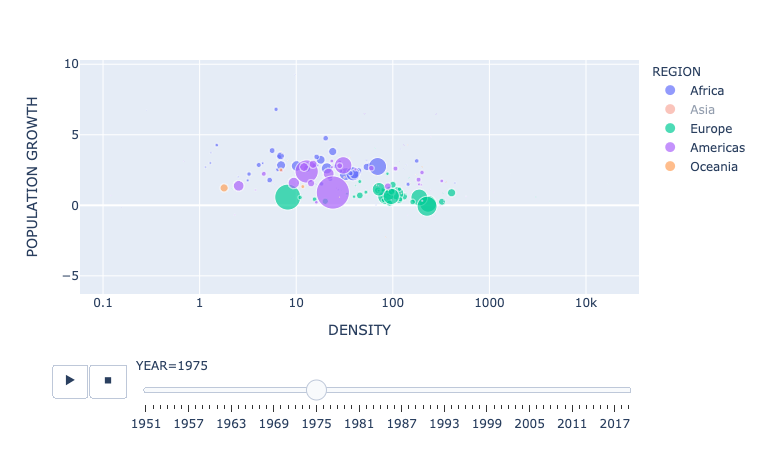

In [9]:
fig = px.scatter(xls_formatted, x="DENSITY", y="POPULATION GROWTH", animation_frame="YEAR", animation_group="COUNTRY",
           size="POPULATION", color="REGION", hover_name="COUNTRY",
           log_x=True, size_max=60)
fig.show()